# Loading the necessary libraries and dataset

In [232]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Dropping an unnecessary feature
data.drop(columns=['id'],inplace=True)



# Preprocessing

Our attribute of interest is residence_type. In the clustering we will be focusing on the subset where residence_type is "urban".

## Data description

In [233]:
print(data.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  


In [234]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [235]:
# Imputing missing values of bmi with the mean
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])

In [236]:
# Filter the dataset to include only instances where the residence type is 'urban'
urban_data = data[data['Residence_type'] == 'Urban']

#Keeping the original urban_data
urban_data_orig=urban_data

In [237]:
print(urban_data.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  2596.000000   2596.000000    2596.000000        2596.000000   
mean     43.542126      0.095146       0.054700         105.927307   
std      22.757380      0.293474       0.227437          45.354246   
min       0.080000      0.000000       0.000000          55.220000   
25%      26.000000      0.000000       0.000000          77.042500   
50%      45.000000      0.000000       0.000000          90.770000   
75%      61.000000      0.000000       0.000000         113.767500   
max      82.000000      1.000000       1.000000         267.760000   

               bmi       stroke  
count  2596.000000  2596.000000  
mean     28.892328     0.052003  
std       7.632162     0.222076  
min      11.300000     0.000000  
25%      23.700000     0.000000  
50%      28.300000     0.000000  
75%      33.100000     0.000000  
max      78.000000     1.000000  


In [238]:
print(urban_data.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Encoding
Preprocessing to convert categorical variables into numerical

In [239]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [240]:
urban_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5101,Female,45.0,0,0,Yes,Private,Urban,97.95,24.500000,Unknown,0
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.900000,Unknown,0
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [241]:
# List of categorical columns to encode
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Dictionary to store classes for each column
encoded_classes = {}

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    urban_data.loc[:, column] = le.fit_transform(urban_data[column])
    encoded_classes[column] = le.classes_

In [242]:
# Access the classes for each categorical column
for column, classes in encoded_classes.items():
    print(f"Classes for {column}: {classes}")

Classes for gender: ['Female' 'Male']
Classes for ever_married: ['No' 'Yes']
Classes for work_type: ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
Classes for Residence_type: ['Urban']
Classes for smoking_status: ['Unknown' 'formerly smoked' 'never smoked' 'smokes']


In [246]:
urban_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,0,228.69,36.6,1,1
3,0,49.0,0,0,1,2,0,171.23,34.4,3,1
5,1,81.0,0,0,1,2,0,186.21,29.0,1,1
7,0,69.0,0,0,0,2,0,94.39,22.8,2,1
9,0,78.0,0,0,1,2,0,58.57,24.2,0,1


In [250]:
# Dictionary that would have stored the label mappings
encoded_classes = {
    'gender': ['Female', 'Male'],
    'ever_married': ['No', 'Yes'],
    'work_type': ['Private', 'Never_worked', 'Self-employed', 'Govt_job', 'Children'],
    'Residence_type': ['Urban', 'Rural'],
    'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'unknown']
}

# Printing the mappings for each category
for column, classes in encoded_classes.items():
    print(f"Encoded categories for {column}:")
    for index, label in enumerate(classes):
        print(f"  {index} -> {label}")
    print()  # Adds a newline for better readability between categories


Encoded categories for gender:
  0 -> Female
  1 -> Male

Encoded categories for ever_married:
  0 -> No
  1 -> Yes

Encoded categories for work_type:
  0 -> Private
  1 -> Never_worked
  2 -> Self-employed
  3 -> Govt_job
  4 -> Children

Encoded categories for Residence_type:
  0 -> Urban
  1 -> Rural

Encoded categories for smoking_status:
  0 -> formerly smoked
  1 -> never smoked
  2 -> smokes
  3 -> unknown



In [186]:
from sklearn.preprocessing import OneHotEncoder

print(urban_data['gender'].value_counts())

gender
0    1529
1    1067
Name: count, dtype: int64


In [187]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)  # Ensure we get a dense array as output
encoded = ohe.fit_transform(urban_data[['gender']])  # Using double brackets to pass a DataFrame

In [188]:
# Drop the original 'gender' column
urban_data = urban_data.drop(['gender'], axis=1)

In [189]:
# Get new column names for the one-hot-encoded variables
new_colnames = ohe.get_feature_names_out(['gender'])

# Add the new one-hot-encoded columns to the DataFrame
urban_data[new_colnames] = encoded

In [190]:
# Renaming the 'gender_0' and 'gender_1' columns to 'male' and 'female' respectively
urban_data = urban_data.rename(columns={'gender_0': 'male', 'gender_1': 'female'})

# Now the columns have been renamed, and you can view the DataFrame to confirm
print(urban_data.head())

    age  hypertension  heart_disease ever_married work_type Residence_type  \
0  67.0             0              1            1         2              0   
3  49.0             0              0            1         2              0   
5  81.0             0              0            1         2              0   
7  69.0             0              0            0         2              0   
9  78.0             0              0            1         2              0   

   avg_glucose_level   bmi smoking_status  stroke  male  female  
0             228.69  36.6              1       1   0.0     1.0  
3             171.23  34.4              3       1   1.0     0.0  
5             186.21  29.0              1       1   0.0     1.0  
7              94.39  22.8              2       1   1.0     0.0  
9              58.57  24.2              0       1   1.0     0.0  


In [191]:
print(urban_data['male'].value_counts())
print(urban_data['female'].value_counts())

male
1.0    1529
0.0    1067
Name: count, dtype: int64
female
0.0    1529
1.0    1067
Name: count, dtype: int64


yup everything fits

## Min-max scaling
We will use Min-max scaling to account for variations in measurement units and scale. If the features are not on the same scale, the larger-scale features might disproportionately influence the cluster assignments.

Since our stroke prediction dataset includes various biomedical and demographic variables which are on different scales, scaling will ensure that each feature contributes equally to the distance calculations.



In [192]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
urban_data.loc[:, urban_data.columns] = scaler.fit_transform(urban_data[urban_data.columns])
urban_data

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,male,female
0,0.816895,0,1,1.0,0.5,0.0,0.816176,0.379310,0.333333,1,0.0,1.0
3,0.597168,0,0,1.0,0.5,0.0,0.545827,0.346327,1.0,1,1.0,0.0
5,0.987793,0,0,1.0,0.5,0.0,0.616308,0.265367,0.333333,1,0.0,1.0
7,0.841309,0,0,0.0,0.5,0.0,0.184295,0.172414,0.666667,1,1.0,0.0
9,0.951172,0,0,1.0,0.5,0.0,0.015762,0.193403,0.0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5101,0.548340,0,0,1.0,0.5,0.0,0.201045,0.197901,0.0,0,1.0,0.0
5103,0.218750,0,0,0.0,0.5,0.0,0.129999,0.533733,0.0,0,1.0,0.0
5105,0.975586,1,0,1.0,0.5,0.0,0.134234,0.263767,0.666667,0,1.0,0.0
5106,0.987793,0,0,1.0,0.75,0.0,0.329256,0.430285,0.666667,0,1.0,0.0


saving the preprocessed data for clustering

In [193]:
urban_data.to_csv("urban_data.csv")

# Modelling

## Setup K-means clustering
Initialize KMeans - set 3 clusters  and random_state 42, and n_init, the number of times the k-means algorithm will run with different seeds to 10

In [194]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

## Fit k-means on X
Call appropriate method on the `kmeans` variable and on the training data stored in `X`

In [195]:
X_urban = urban_data.drop(columns=["stroke"]) #only fearures
y_urban = urban_data[["stroke"]] #for further quality evaluation, keeping only target variable
kmeans.fit(X_urban)

KMeans(n_clusters=3, n_init=10, random_state=42)

## Inspect clusters
Get labels (cluster assignment) for train data - use property of the kmeans variable

In [196]:
labels = kmeans.labels_

Get cluster centers (centroids) - use property of the kmeans variable

In [197]:
centers = kmeans.cluster_centers_

## Visualize clusters with PCA
PCA is an unsupervised machine learning technique that finds principal components (linear combinations of the predictor variables) that explain a large portion of the variation in a dataset.

In [198]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_urban)

centers_pca = pca.transform(centers)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


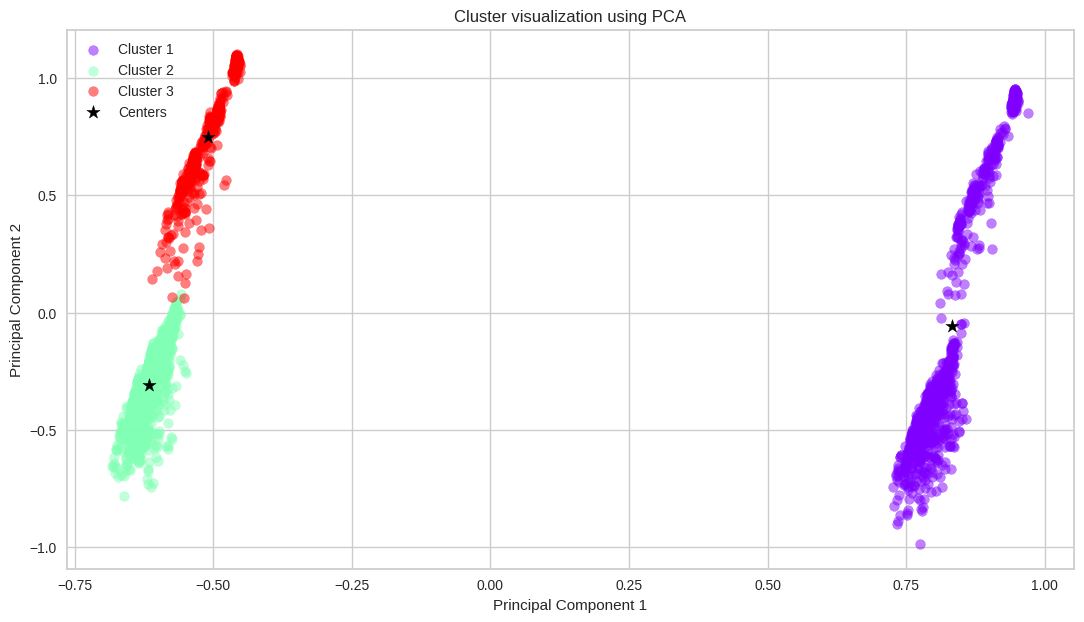

In [199]:
n_clusters = len(np.unique(labels))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(13, 7))


for i, color in zip(range(n_clusters), colors):
    cluster_indices = np.where(labels == i)
    plt.scatter(X_pca[cluster_indices, 0], X_pca[cluster_indices, 1], color=color, alpha=0.5, label=f'Cluster {i+1}')


plt.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='*', s=100, c='black', label='Centers')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster visualization using PCA')
plt.legend()
plt.show()

### Wrap plot to function

In [200]:
def plot_clusters_with_pca(X, n_clusters=5, max_iter=100, n_init=10, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, n_init=n_init, random_state=random_state)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    pca = PCA(n_components=2, random_state=random_state)
    X_pca = pca.fit_transform(X)
    centers_pca = pca.transform(centers)

    plt.figure(figsize=(13, 7))
    # Define a color map for the number of clusters
    colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
    for i in range(n_clusters):
        cluster_points = X_pca[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], alpha=0.5, label=f'Cluster {i+1}')

    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], marker='*', s=100, c='black', label='Centers')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Cluster visualization using PCA')
    plt.legend()
    plt.show()

Change function called get_kmeans_metrics so that this function accepts four new input parameters and passes their values to kmeans:

* n_clusters
* max_iter
* n_init
* random_state

In [201]:
def get_kmeans_metrics(X: pd.DataFrame,n_clusters=5,  max_iter=100, n_init=10, random_state=40):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, n_init=n_init, random_state=random_state)
    kmeans.fit(X)
    return dict(centers=kmeans.cluster_centers_, labels=kmeans.labels_, inertia=kmeans.inertia_)

In [202]:
import inspect
params = inspect.signature(get_kmeans_metrics).parameters
param_names = set(param for param in params.keys())

param_names

{'X', 'max_iter', 'n_clusters', 'n_init', 'random_state'}

### Trying different cluster counts
Try various metaparameter settings and we'll choose the most suitable value by looking and guessing.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


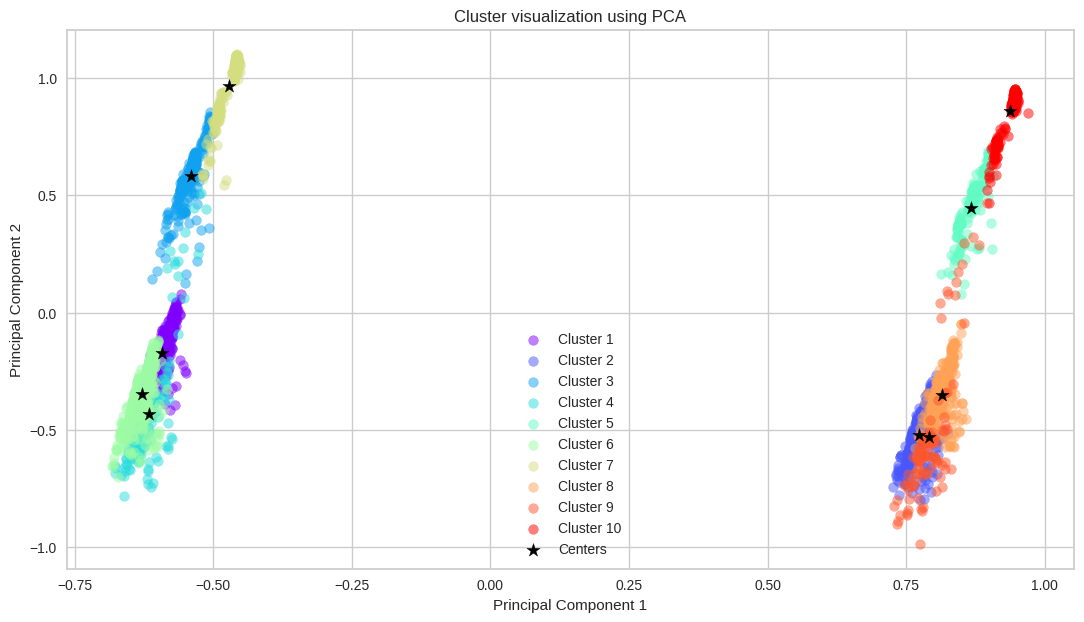

In [203]:
plot_clusters_with_pca(X_urban,n_clusters=10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


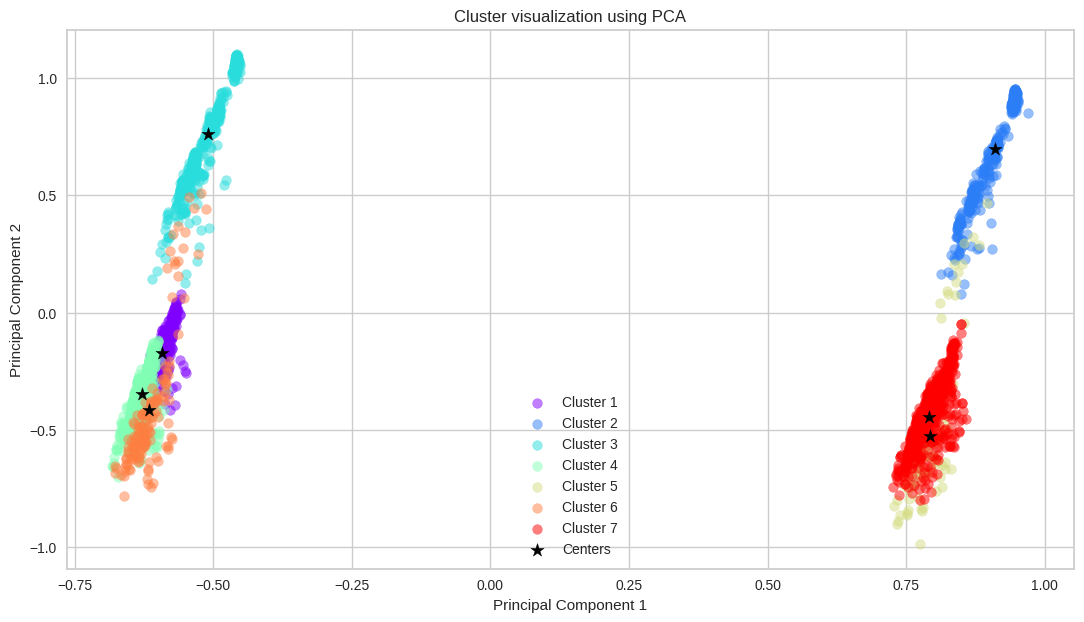

In [204]:
plot_clusters_with_pca(X_urban,n_clusters=7)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


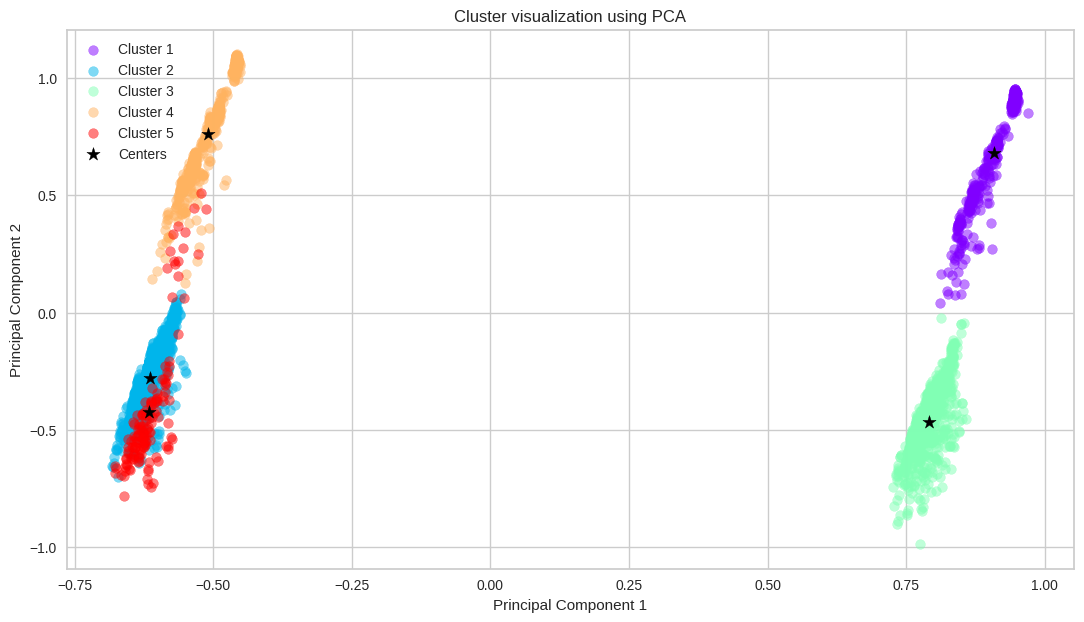

In [205]:
plot_clusters_with_pca(X_urban,n_clusters=5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


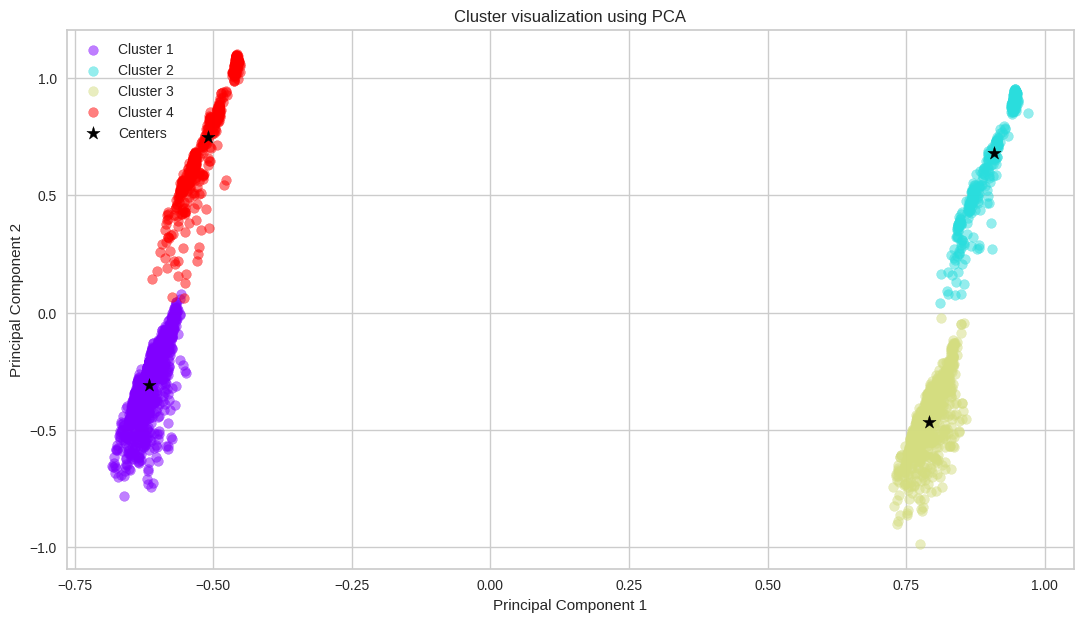

In [206]:
plot_clusters_with_pca(X_urban,n_clusters=4)

The last one is probably the correct one - we can see from the visualization four distinct clusters and we'll check the most suitable value later.

## Visualize with agglomerative clustering (dendrogram)

In [207]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hierarchical_clustering.fit(X_urban)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [208]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # Create linkage matrix
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

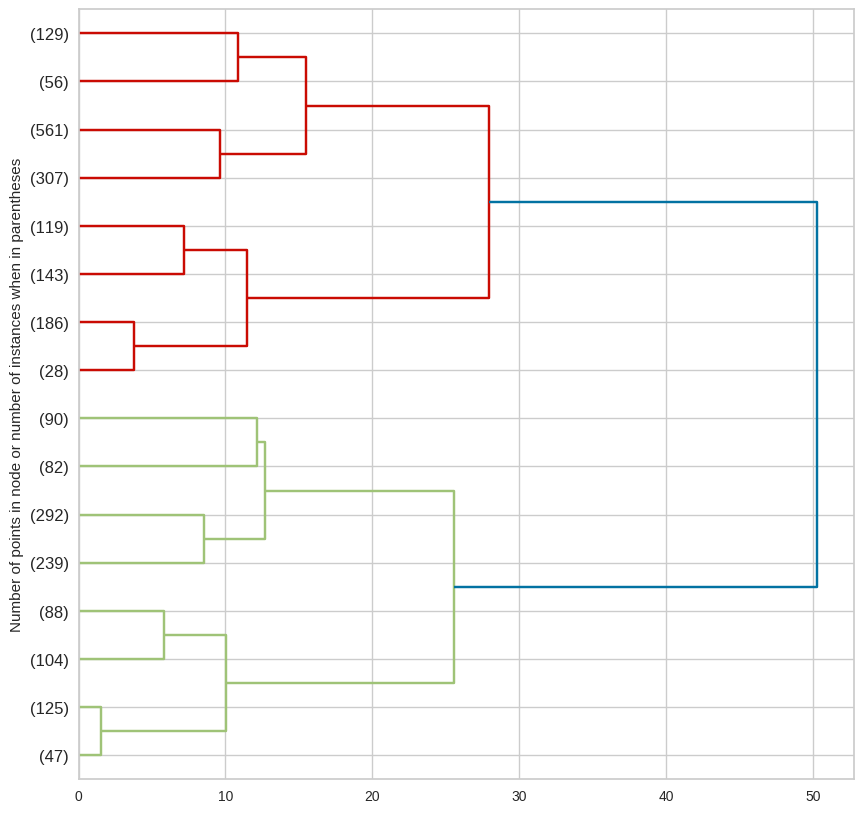

In [209]:
fig = plt.figure(figsize=(10,10))
plt.ylabel("Number of points in node or number of instances when in parentheses")
plot_dendrogram(hierarchical_clustering, truncate_mode="level", p=3, orientation='right',leaf_font_size=12)

### Experimenting with different thresholds

In [210]:
# definine linkage_matrix
counts = np.zeros(hierarchical_clustering.children_.shape[0])

linkage_matrix = np.column_stack(
    [hierarchical_clustering.children_, hierarchical_clustering.distances_, counts]
).astype(float)

In [211]:
# Wrap function for the cluster identification

from scipy.cluster.hierarchy import fcluster

def get_cluster_identification(hierarchical_clustering, threshold):
    # Perform cluster identification
    clusters = fcluster(linkage_matrix, threshold, criterion='distance')

    # Get number of clusters
    num_clusters = len(np.unique(clusters))

    # Calculate cluster sizes
    cluster_sizes = {}
    for cluster_num in range(1, num_clusters + 1):
        cluster_size = np.sum(clusters == cluster_num)
        cluster_sizes[cluster_num] = cluster_size

    # Print cluster sizes
    print("Number of clusters:", num_clusters)
    print("Cluster sizes:")
    for cluster_num, cluster_size in cluster_sizes.items():
        print(f"Cluster {cluster_num}: {cluster_size} data points")

threshold=10

In [212]:
threshold=10
get_cluster_identification(hierarchical_clustering, threshold)

Number of clusters: 10
Cluster sizes:
Cluster 1: 172 data points
Cluster 2: 192 data points
Cluster 3: 531 data points
Cluster 4: 82 data points
Cluster 5: 90 data points
Cluster 6: 214 data points
Cluster 7: 262 data points
Cluster 8: 868 data points
Cluster 9: 56 data points
Cluster 10: 129 data points


threshold=20

In [213]:
threshold=20
get_cluster_identification(hierarchical_clustering, threshold)

Number of clusters: 4
Cluster sizes:
Cluster 1: 364 data points
Cluster 2: 703 data points
Cluster 3: 476 data points
Cluster 4: 1053 data points


threshold=30

In [214]:
threshold=30
get_cluster_identification(hierarchical_clustering, threshold)

Number of clusters: 2
Cluster sizes:
Cluster 1: 1067 data points
Cluster 2: 1529 data points


# Evaluation


## Best inertia for KMeans
KElbowVisualizer finds the best number of clusters using the within-cluster sum of the squares WCSS, also called inertia or distortion. It plots the relationship of inertia and the number of clusters and uses the elbow rule to get the best number of clusters, so we'll check it to verify the most suitable number, four, which we guessed previously.

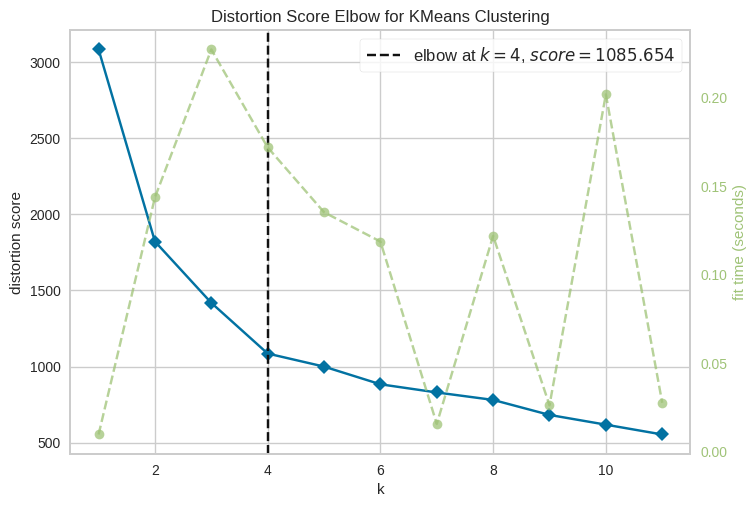

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [215]:
from yellowbrick.cluster import KElbowVisualizer
kmeans_tune = KMeans(random_state=42,n_init = 2,max_iter=10)
visualizer = KElbowVisualizer(kmeans_tune, k=(1,12),metric="distortion")
visualizer.fit(X_urban)
visualizer.show()

From the visualization, we can see the elbow point in the graph, which is marked by the vertical dashed line at k=4.
That indicates that four is indeed the optimal number of clusters.

In [216]:
best_inertia_score_KElbowVisualizer = visualizer.elbow_score_
best_inertia_score_KElbowVisualizer

1085.6538255529154

In our case, the number of clusters was determined to be **four** based on the analysis of the Within-Cluster Sum of Squares (WCSS) value comparison.

### Lets also manually compute it by finding the best inertia
Finding the best number of clusters using WCSS (inertia). Plotting the relationship of inertia and the number of clusters. Using the elbow rule to get the best number of clusters.

We will use KMeans(random_state=42,n_init = 2,max_iter=10) and try the following numbers of clusters:1,2,3,4,5,6,7,8,9,10,11,12.

[{'cluster_count': 1, 'inertia': 3083.51911099846},
 {'cluster_count': 2, 'inertia': 1821.803000063699},
 {'cluster_count': 3, 'inertia': 1418.7219075889584},
 {'cluster_count': 4, 'inertia': 1085.6538255529135},
 {'cluster_count': 5, 'inertia': 999.9049361233072},
 {'cluster_count': 6, 'inertia': 883.6761791317709},
 {'cluster_count': 7, 'inertia': 830.0171236493995},
 {'cluster_count': 8, 'inertia': 780.9975417461762},
 {'cluster_count': 9, 'inertia': 682.3651926969665},
 {'cluster_count': 10, 'inertia': 618.3524972097414},
 {'cluster_count': 11, 'inertia': 553.9614614412751},
 {'cluster_count': 12, 'inertia': 514.5350582616737}]

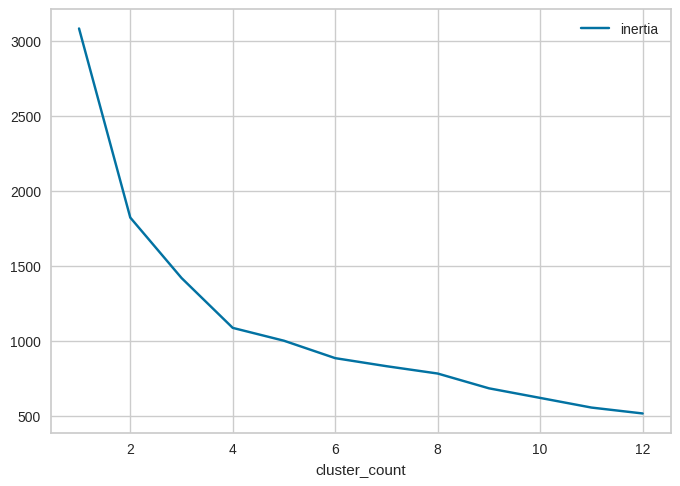

In [217]:
l = []
for cluster_count in [1,2, 3, 4, 5, 6, 7, 8, 9, 10,11,12]:
    scores = get_kmeans_metrics(X_urban, n_clusters=cluster_count, max_iter=10, n_init=2, random_state=42)
    l += [dict(cluster_count=cluster_count, inertia=scores['inertia'])]
pd.DataFrame(l).plot(x="cluster_count")
l

In [218]:
inertia_for_four_clusters= next(item['inertia'] for item in l if item['cluster_count'] == 4)
inertia_for_four_clusters

1085.6538255529135

In [219]:
best_inertia_score_KElbowVisualizer

1085.6538255529154

When we analyze the WCSS value of the elbow point, it is observed at k=4, suggesting that increasing the number of clusters beyond four yields would lead to overfitting with too many clusters.

So even when computed manually, we get the same result, that four is the optimal number of clusters.

## Scree plot
The scree plot tells us how much variance in the dataset is explained by each principal component - basically how much information is explained with each of the principal component


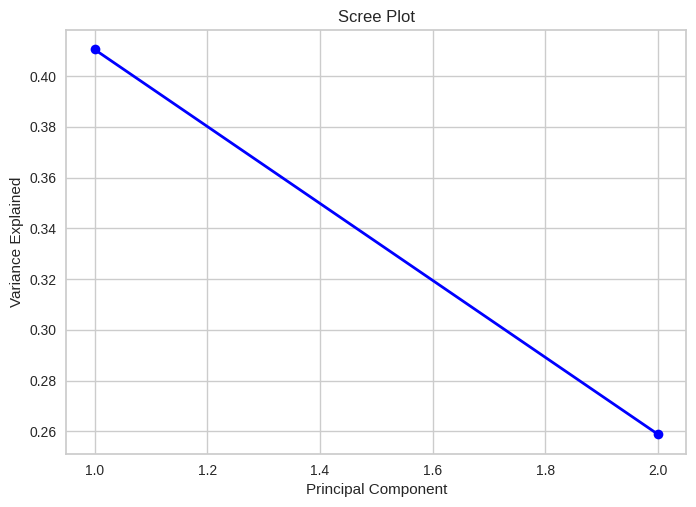

In [220]:
PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [221]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.41043398 0.25878295]


0.6692169373810262

The first principle explains 41.04 % of total variation of the dataset and the second one explains 25.88% of the total variation.
The sum of both principle is 66.92 % is pretty solid.

Let's try if changing the amount of Princple Components (PC) would be better. But since it will be multiple dimenstional, we are unable to visualize it.

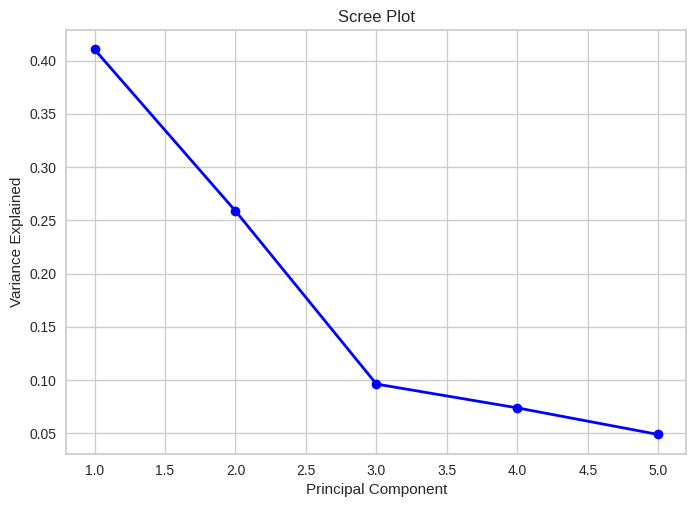

[0.41043398 0.25878295 0.09633467 0.07397223 0.0490007 ]


0.8885245346944308

In [222]:
pca = PCA(n_components=5)
pca_fit = pca.fit(X_urban)

PC_values = np.arange(pca.n_components_) + 1

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

Now that's much better.

Given the number of features, explaining 67 % of the variance with the first two principal components indicates that your PCA has captured a significant amount of information. However, there's still a considerable amount of variance left unexplained.

For visualizing data in 2D or 3D, 67 % might be sufficient to get a sense of the data structure. Although it may be better to choose a higher number of principal components, for example, setting n_components = 5 explains 88.85% of the variation of the dataset, which is good.

However, for the sake of visualizations, we'll continue with 2 PC's.

## Loadings
Loadings are coefficients of the linear combination of the original variables from which the principal components (PCs) are constructed. To put it simply, they indicate the contribution of the variables to the principal component


In [223]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X_urban)

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X_urban.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2
variable,,
age,-3.842176e-02,-3.941132e-01
hypertension,-5.525496e-03,-1.427977e-01
heart_disease,2.645531e-02,-8.031168e-02
ever_married,-7.331132e-02,-7.955724e-01
work_type,4.851357e-02,2.460820e-01
Residence_type,-4.336809e-19,-4.336809e-19
avg_glucose_level,1.150364e-02,-9.755978e-02
bmi,-1.066756e-02,-8.459409e-02
smoking_status,-6.477945e-02,-3.109589e-01


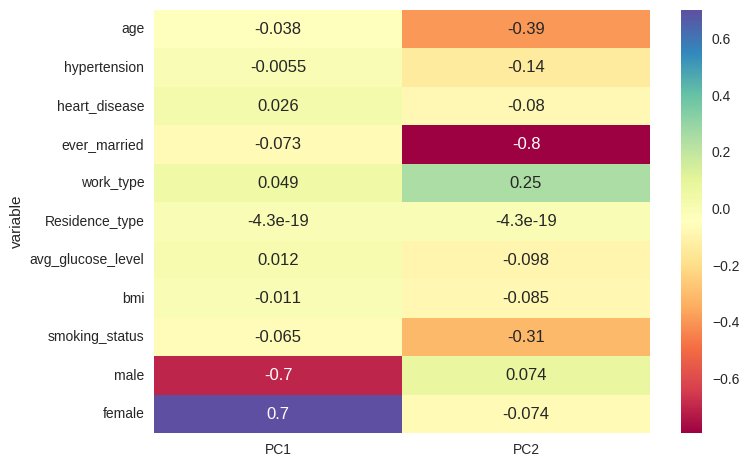

In [224]:
import seaborn as sns

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

From this heat map visualization we see that gender contributed quite a lot to the first PC and marriage status also contributed  alot in the second PC



## Cluster visualization for 4 clusters

In [225]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(urban_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


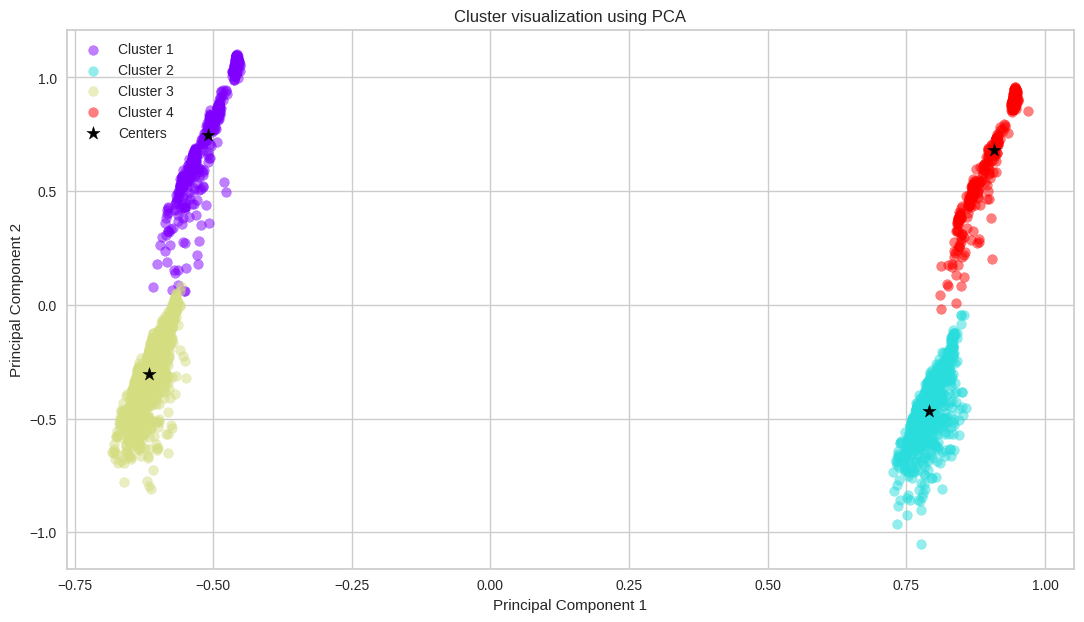

In [226]:
plot_clusters_with_pca(urban_data,n_clusters=4)

When looking at the cluster separation, there are clearly four distrinct clusters. There are two on the right side and the left side.

The distance between the two subgroups of clusters is quite big, while the two clusters on each side are very close together and slightly overlapping. Cluster density is quite high, especially when looking at the cluster 2 and 3. However, in cluster 1 and 4 the points are a little bit more scattered.

Since, we're using the PCA clustering, the spread along the principal component axes can give us a sense of the data's variance If one cluster is spread out over a wide range on the principal component axes while another is very tight, it could suggest different levels of variance within the groups. We can see that for example cluster 4 is a lot tighter than cluster 2.

The centroinds of clusters 2 and 3 are visually in the middle of the clusters, while centroids of clusters 1 and 4 are a little more skewed. We can see that the density of instances is a lot higher at the upper part of the cluster and the instances are more spread out at the bottom part of the cluster. That is why the position of the centroid is sliglity at the top part (more dense part) of the cluster.

### Visualization clusters by target class membership

Text(0.5, 1.0, 'PCA-reduced data by stroke')

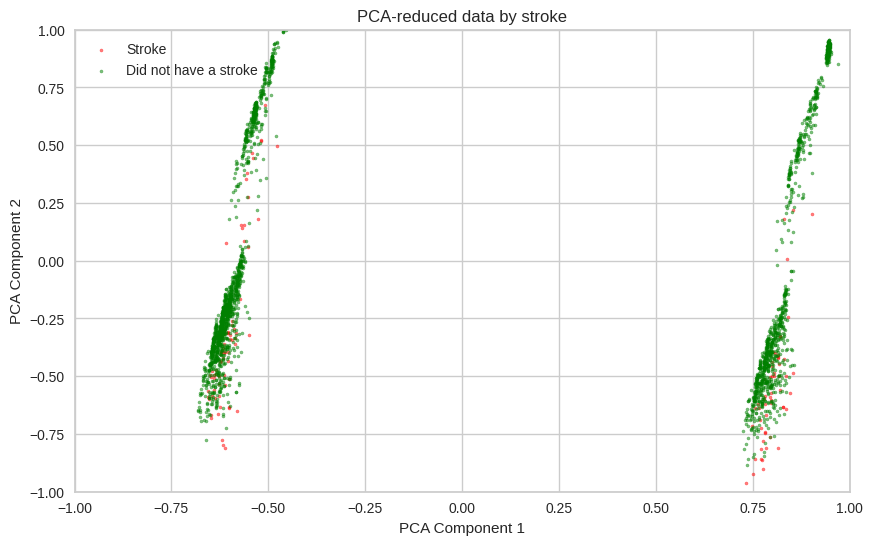

In [227]:
pca_stroke=pca_fit[urban_data['stroke']==1]
pca_nostroke=pca_fit[urban_data['stroke']==0]

plt.figure(figsize=(10, 6))
plt.scatter(pca_stroke[:, 0], pca_stroke[:, 1], label='Stroke', alpha=0.5, s=5, color="red")
plt.scatter(pca_nostroke[:, 0], pca_nostroke[:, 1], label='Did not have a stroke', alpha=0.5, s=5, color="green")
plt.legend()
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA-reduced data by stroke")

Because of the high target class imbalance (in the original dataset there is only a minority of people who had a stroke compared to people who hadn´t) in all of the four clusters the majority of people did not have a stroke. But we can still see that for example in the top-right cluster, there are definitelly less instances of people who had stroke than in the bottom-right cluster.

### Visualization of individual clusters by target class membership

Here we can see all of the individual clusters. The number of instances where the person had or did not have a stroke is written above each visualization of the cluster.

pca_stroke 17, pca_nostroke 484


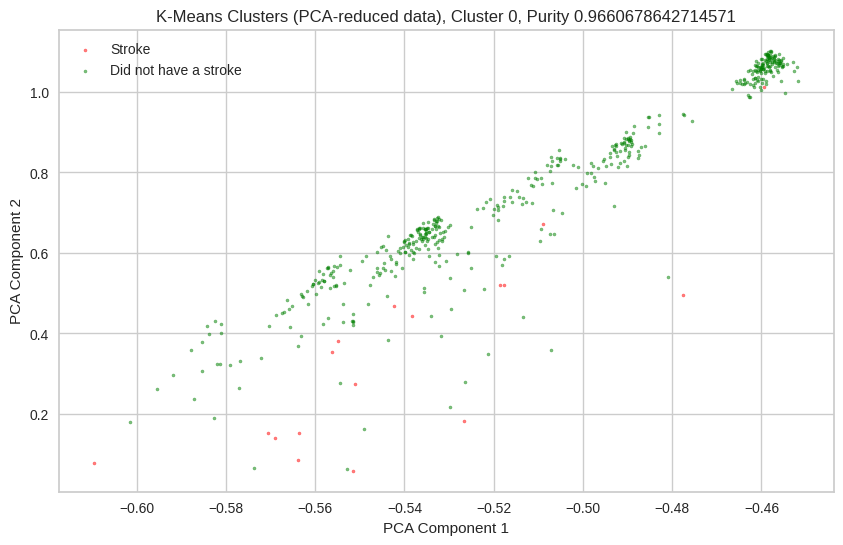

pca_stroke 54, pca_nostroke 630


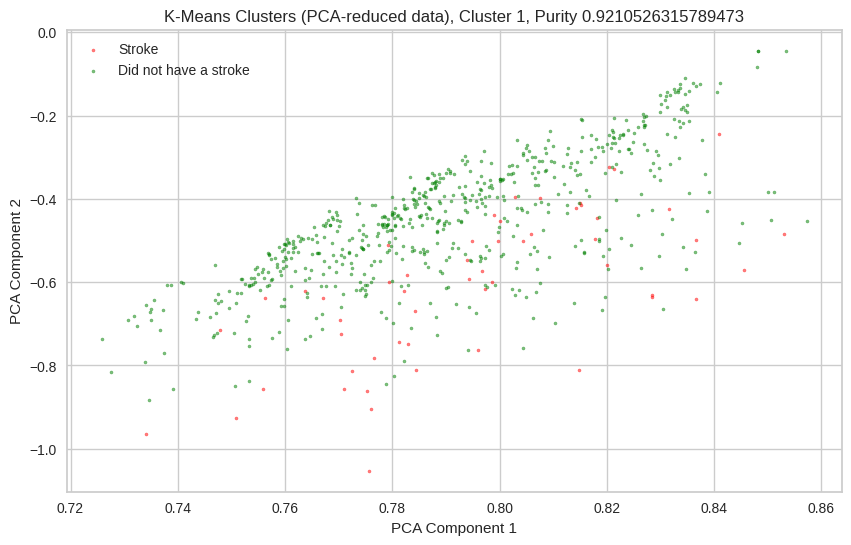

pca_stroke 60, pca_nostroke 968


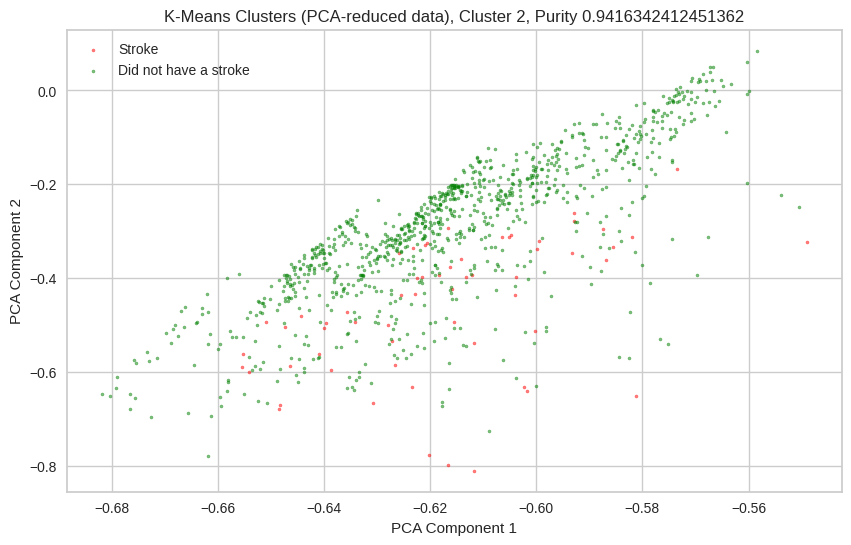

pca_stroke 4, pca_nostroke 379


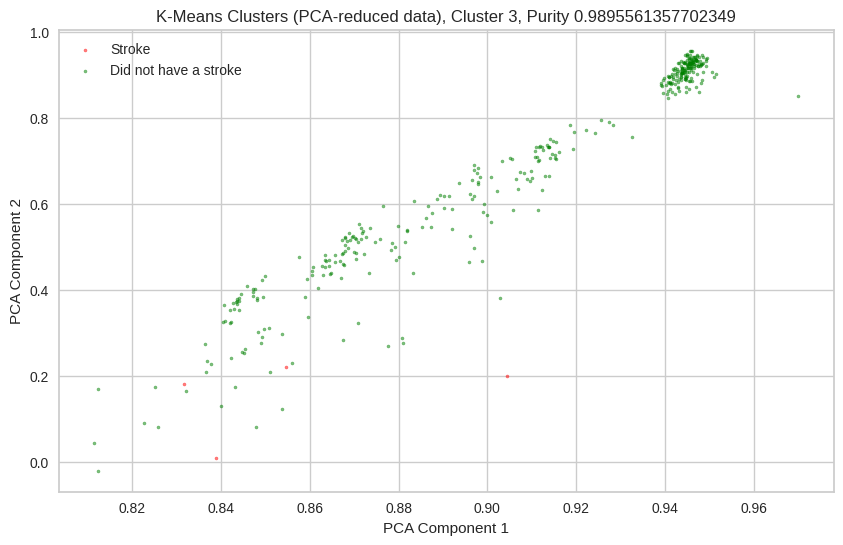

In [142]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(urban_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

for cluster_num in range(kmeans.n_clusters):
    cluster_mask = (kmeans.labels_ == cluster_num)
    pca_stroke = pca_fit[(cluster_mask) & (urban_data['stroke']==1)]
    pca_nostroke = pca_fit[(cluster_mask)  & (urban_data['stroke']==0)]
    plt.figure(figsize=(10, 6))

    plt.scatter(pca_stroke[:, 0], pca_stroke[:, 1], label="Stroke", alpha=0.5, s=5, color="red")
    plt.scatter(pca_nostroke[:, 0], pca_nostroke[:, 1], label="Did not have a stroke", alpha=0.5, s=5, color="green")
    print(f"pca_stroke {pca_stroke.shape[0]}, pca_nostroke {pca_nostroke.shape[0]}")
    purity=max(pca_stroke.shape[0],pca_nostroke.shape[0])/(pca_stroke.shape[0]+pca_nostroke.shape[0])

    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(f"K-Means Clusters (PCA-reduced data), Cluster {cluster_num}, Purity {purity}")
    plt.legend()
    plt.show()

## Best inertia for agglomerative clustering


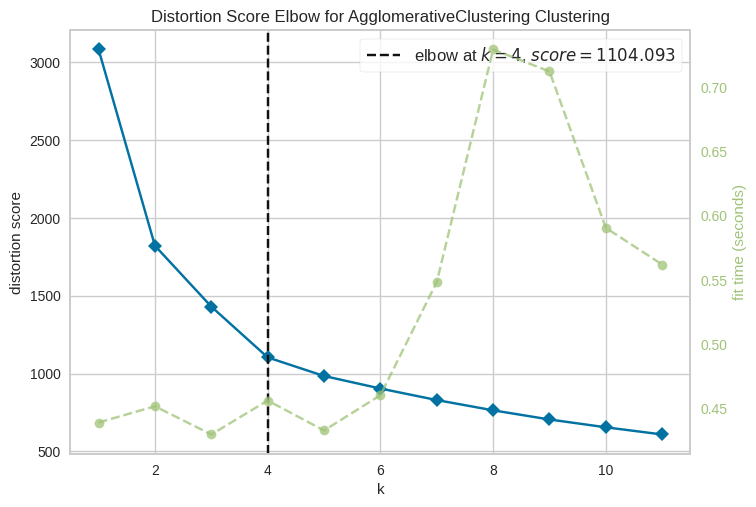

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [143]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

agglo_tune = AgglomerativeClustering()
visualizer = KElbowVisualizer(agglo_tune, k=(1,12),metric="distortion")
visualizer.fit(X_urban)
visualizer.show()

the best number of clusters for the agglomerative clustering is 4

### visualization for 4 clusters

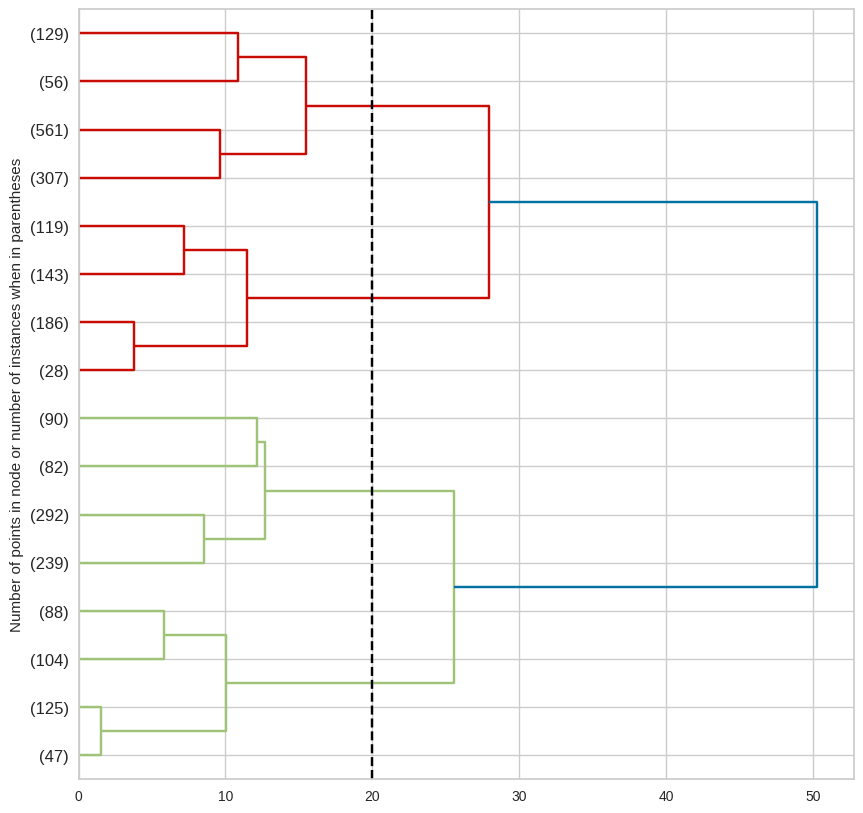

In [144]:
fig = plt.figure(figsize=(10,10))
plt.ylabel("Number of points in node or number of instances when in parentheses")
plot_dendrogram(hierarchical_clustering, truncate_mode="level", p=3, orientation='right',leaf_font_size=12)
plt.axvline(x=20, color="black", linestyle='--')

## Quality of agglomerative clustering

Agglomerative clustering setup for 4 clusters

In [145]:
hierarchical_clustering_best_inertia = AgglomerativeClustering(n_clusters=4)
hierarchical_clustering_best_inertia.fit(X_urban)

AgglomerativeClustering(n_clusters=4)

### Silhouette Score
Silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [146]:
from sklearn.metrics import silhouette_score

instances_clusters_agg = hierarchical_clustering_best_inertia.labels_

silhouette_avg = silhouette_score(X_urban, instances_clusters_agg)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4101455517831493


The silhouette score is not very good

### Rand index

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings

In [147]:
from sklearn import metrics
import random

instances_clusters_agg = hierarchical_clustering_best_inertia.labels_
ground_truth_clusters_agg = list(y_urban["stroke"])
random_clusters_agg = [random.randint(0, 1) for i in range(y_urban.shape[0])]

found clusters vs. target variable

In [148]:
metrics.rand_score(instances_clusters_agg, ground_truth_clusters_agg)

0.3252978496634811

random clusters vs. target variable

In [149]:
metrics.rand_score(random_clusters_agg, ground_truth_clusters_agg)

0.5002137570473026

We can see that our determined clusters do not match the target variable better than random clusters. We can not separate people into two groups of people who had a stroke and did not have a stroke, based on all used features.


## Quality of KMeans clustering

KMeans clustering setup for 4 clusters


In [150]:
kmeans_best_inertia = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_best_inertia.fit(X_urban)

KMeans(n_clusters=4, n_init=10, random_state=42)

### Silhouette Score

In [151]:
from sklearn.metrics import silhouette_score

instances_clusters_kmeans = kmeans_best_inertia.predict(X_urban)

silhouette_avg = silhouette_score(X_urban, instances_clusters_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4179811548116504


The Silhouette score is not very good for kmeans either.

### Rand index

In [152]:
instances_clusters_kmeans = list(kmeans_best_inertia.predict(X_urban))
ground_truth_clusters_kmeans = list(y_urban["stroke"])
random_clusters_kmeans = [random.randint(0, 1) for i in range(y_urban.shape[0])]

found clusters vs target variable

In [153]:
metrics.rand_score(instances_clusters_kmeans, ground_truth_clusters_kmeans)

0.3231935302867016

random clusters vs target variable

In [154]:
metrics.rand_score(random_clusters_kmeans, ground_truth_clusters_kmeans)

0.5001920844577845

We can see that for kmeans clustering our determined clusters do not match the target variable better than random clusters as well. We can not separate people into two groups of people who had a stroke and did not have a stroke, based on all used features.

Maybe if we use only some attributes for clustering and not all of them, the rand index would bee higher...

# Explanation
In this section we will interpret the final clusters based on their centroids and the number of instances in each cluster.
Use the model to classify the chosen instance into a cluster and inspect the assigned cluster.  

## Cluster description - agglomerative clustering

Adding a "cluster" column to the subset of the data

In [155]:
hierarchical_clustering_best_inertia.labels_

array([1, 0, 1, ..., 0, 0, 0])

In [156]:
urban_data_agg=urban_data
urban_data_agg["cluster"] = hierarchical_clustering_best_inertia.labels_

aggregating function

In [157]:
# aggregating function
def agg_func(x):
    if (urban_data.dtypes[x.name] == "object"):
        #for nominal values, we take the most frequent value
        return x.value_counts().index[0]
    else:
        #for numerical values, we take the mean
        return x.mean()

Summarizing the statistics of each variable for each cluster

In [158]:
# Group data by cluster labels and apply aggregation function
cluster_groups_agg = urban_data_agg.groupby('cluster')
cluster_summary_agg = urban_data_agg.groupby('cluster').agg(agg_func)

pd.DataFrame(cluster_summary_agg)

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,male,female
cluster,,,,,,,,,,,,
0,0.656858,0.136752,0.056030,1.0,0.5,0.0,0.253150,0.291163,0.666667,0.064577,1.0,0.0
1,0.677859,0.146515,0.116643,1.0,0.5,0.0,0.283397,0.294559,0.666667,0.079659,0.0,1.0
2,0.276943,0.000000,0.000000,0.0,0.5,0.0,0.178100,0.212153,0.000000,0.018908,1.0,0.0
3,0.212251,0.000000,0.002747,0.0,1.0,0.0,0.188948,0.192442,0.000000,0.005495,0.0,1.0


### Unscaling my data

In [159]:
min_values = scaler.data_min_
max_values = scaler.data_max_

# Get the column names
column_names = urban_data.columns

# Create the scaling_params dictionary
scaling_params = {}
for column, min_val, max_val in zip(column_names, min_values, max_values):
    scaling_params[column] = (min_val, max_val)

scaling_params

{'age': (0.08, 82.0),
 'hypertension': (0.0, 1.0),
 'heart_disease': (0.0, 1.0),
 'ever_married': (0.0, 1.0),
 'work_type': (0.0, 4.0),
 'Residence_type': (0.0, 0.0),
 'avg_glucose_level': (55.22, 267.76),
 'bmi': (11.3, 78.0),
 'smoking_status': (0.0, 3.0),
 'stroke': (0.0, 1.0),
 'male': (0.0, 1.0),
 'female': (0.0, 1.0)}

In [160]:
# Function to reverse the Min-Max scaling for a given column
def reverse_scaling(column_name, scaled_value):
    min_val, max_val = scaling_params[column_name]
    return scaled_value * (max_val - min_val) + min_val

# Iterate over each column in the DataFrame and reverse the scaling
for column in cluster_summary_agg.columns:
    cluster_summary_agg[column] = cluster_summary_agg[column].apply(lambda x: reverse_scaling(column, x))

In [161]:
cluster_summary_agg

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,male,female
cluster,,,,,,,,,,,,
0,53.889839,0.136752,0.056030,1.0,2.0,0.0,109.024568,30.720547,2.0,0.064577,1.0,0.0
1,55.610242,0.146515,0.116643,1.0,2.0,0.0,115.453115,30.947078,2.0,0.079659,0.0,1.0
2,22.767143,0.000000,0.000000,0.0,2.0,0.0,93.073340,25.450627,0.0,0.018908,1.0,0.0
3,17.467582,0.000000,0.002747,0.0,4.0,0.0,95.379038,24.135859,0.0,0.005495,0.0,1.0


In [162]:
cluster_groups_agg.size()

cluster
0    1053
1     703
2     476
3     364
dtype: int64

We can see the characteristics of each cluster (computed by using the most frequent values for nominal values and mean for numerical values)

Because of the class inbalance (in the original dataset there is only a minority of people who had a stroke - value 1), therefore the target variable "stroke" is quite small for all clusters. But clusters 0 and 1 have a few more insatnec of people who had stroke compared to the other clusters.

We can see that clusters 0 and 1 are very similar with the main difference being the gender of the person, they also slightly diffen in the heart_disease variable. Both clutsters describe people in their 50s, together these clusters describe almost 70% of our subset of the dataset.

Clusters 2 and 3 are also very similar, the main difference is also in the gender of the person and also in their work type. In cluster 2 most people´s work type is private while cluster 3 describes children. Both clusters describe about 30% of our subset.

**Cluster 0** appears to represent middle-aged individuals (average age approximately 54) who are mostly married and predominantly male, with an average BMI indicating overweight or obesity (around 30.7), and moderate average glucose levels. This group predominantly smokes, with relatively moderate incidences of hypertension and heart disease. The stroke incidence rate in this group is about 6.5%, indicating a significant health risk.

**Cluster 1** comprises older individuals (average age approximately 56), also mostly married and predominantly female, with slightly higher average BMI (around 30.9) and glucose levels than Cluster 0. This group, which also smokes, exhibits the highest levels of hypertension and heart disease among all clusters, correlating with the highest stroke incidence rate at approximately 8%. Their profile suggests a very high risk of health issues.

**Cluster 2** includes young adults (average age approximately 23), predominantly male, likely unmarried, with healthier average BMI (around 25.5) and the lowest average glucose levels across the clusters. They are non-smokers with no reported cases of hypertension or heart disease, reflecting their lower stroke incidence rate of about 1.9%.

**Cluster 3** is the youngest group (average age approximately 17), predominantly female, and likely unmarried. They generally do not work (indicated by a work_type of children), exhibit the healthiest BMI (around 24.1), and have low average glucose levels. This group does not smoke, and their health profile shows minimal instances of hypertension or heart disease, with a very low stroke incidence rate of approximately 0.55%. This cluster represents the lowest health risk in terms of stroke probability.

Clusters 0 and 1 represent older, married individuals with higher health risks and higher stroke incidence, reflecting typical high-risk profiles due to age, marital status, lifestyle choices (smoking), and work type (self-employed, likely indicating higher stress or longer working hours).

Clusters 2 and 3 consist of younger, healthier individuals with minimal health issues and lower stroke risk, distinguished by their age, single status, and healthier lifestyle choices. These clusters likely have less exposure to chronic stress or health-degrading habits compared to the older clusters.

## Classifying an instance into a cluster (agglomerative)

In [163]:
instance_index = 90
urban_data_orig[instance_index:instance_index+1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,0,1.32,0,0,0,4,0,70.37,28.893237,0,1


In [164]:
instance = X_urban[instance_index:instance_index+1]
cluster_assignments = hierarchical_clustering_best_inertia.fit_predict(X_urban)
cluster_assignment = cluster_assignments[instance_index]

print(f"Instance #{instance_index} assigned to cluster: {cluster_assignment}")


Instance #90 assigned to cluster: 2


Cluster two for the hierarchical clustering method describes males who are about 23 years old, dont have hypertension dont have a heart disease are not married, their work type is private and of course live in an urban area. They have a sligthly below average qlucose level and their bmi is about 25. Their smoking status is unknown and they mostly did not have a stroke

## Cluster description - KMeans

adding column "cluster" to my subset of the data

In [165]:
kmeans_best_inertia.labels_

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

In [166]:
urban_data_kmeans=urban_data
urban_data_kmeans["cluster"] = kmeans_best_inertia.labels_

In [167]:
# Group data by cluster labels and apply aggregation function
cluster_groups_kmeans = urban_data_agg.groupby('cluster')
cluster_summary_kmeans = urban_data_kmeans.groupby('cluster').agg(agg_func)

pd.DataFrame(cluster_summary_kmeans)


,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,male,female
cluster,,,,,,,,,,,,
0,0.654166,0.123541,0.046693,1.0,0.5,0.0,0.250870,0.290162,0.666667,0.058366,1.0,0.0
1,0.232977,0.031414,0.018325,0.0,1.0,0.0,0.188033,0.196898,0.000000,0.010471,0.0,1.0
2,0.678536,0.132847,0.110949,1.0,0.5,0.0,0.286389,0.294757,0.666667,0.078832,0.0,1.0
3,0.301425,0.033932,0.021956,0.0,0.5,0.0,0.186523,0.218148,0.000000,0.033932,1.0,0.0


### Unscaling my data

In [168]:
min_values = scaler.data_min_
max_values = scaler.data_max_

# Get the column names
column_names = urban_data.columns

# Create the scaling_params dictionary
scaling_params = {}
for column, min_val, max_val in zip(column_names, min_values, max_values):
    scaling_params[column] = (min_val, max_val)

scaling_params

{'age': (0.08, 82.0),
 'hypertension': (0.0, 1.0),
 'heart_disease': (0.0, 1.0),
 'ever_married': (0.0, 1.0),
 'work_type': (0.0, 4.0),
 'Residence_type': (0.0, 0.0),
 'avg_glucose_level': (55.22, 267.76),
 'bmi': (11.3, 78.0),
 'smoking_status': (0.0, 3.0),
 'stroke': (0.0, 1.0),
 'male': (0.0, 1.0),
 'female': (0.0, 1.0)}

In [169]:
# Reversing the scaling
for column in cluster_summary_kmeans.columns:
    cluster_summary_kmeans[column] = cluster_summary_kmeans[column].apply(lambda x: reverse_scaling(column, x))

In [170]:
cluster_summary_kmeans

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,male,female
cluster,,,,,,,,,,,,
0,53.669261,0.123541,0.046693,1.0,2.0,0.0,108.539990,30.653836,2.0,0.058366,1.0,0.0
1,19.165445,0.031414,0.018325,0.0,4.0,0.0,95.184503,24.433069,0.0,0.010471,0.0,1.0
2,55.665693,0.132847,0.110949,1.0,2.0,0.0,116.089095,30.960315,2.0,0.078832,0.0,1.0
3,24.772774,0.033932,0.021956,0.0,2.0,0.0,94.863613,25.850483,0.0,0.033932,1.0,0.0


In [171]:
cluster_groups_kmeans.size()

cluster
0    1028
1     382
2     685
3     501
dtype: int64

We get similar results as for the agglomerative clustering
(just different order of the clusters), the number of instances in each cluster also differs slightly. This time cluster 0 represents the majority of all people in our subset of the dataset.

There are again 2 groups of two clusters that are very similar (clusters 0 and 2, and clusters 1 and 3). Clusters 0 and 2 represent people in their 50s while the other two clusters represent young people. Both groups of clustrs have very similar values of almost all variables with the main difference in gender.



**Cluster 0** appears to represent middle-aged individuals (the average age os approx. 53) who are mostly married, predominantly male, with an average BMI indicating overweight or obesity (over 30), moderate average glucose levels, and smokes. The presence of hypertension and heart disease is relatively low, and the stroke incidence rate in this group is around 5.8%.

**Cluster 1** consists of young individuals (average age approx. 19), likely unmarried, predominantly female ('male' 0, 'female' 1), with a healthy average BMI (around 24), and lower average glucose levels. This group has the lowest stroke incidence rate at about 1%, and they are characterized by the 'work_type' being 4, which is children and a smoking status of formerly smoked.

**Cluster 2** includes older individuals (average age approx. 55), again mostly married, predominantly female, with an overweight or obese BMI, and higher average glucose levels. They have a higher occurrence of hypertension and heart disease compared to the other clusters and the highest stroke incidence rate at nearly 7.9%. This group also has a smoking status of 2, which indicates they smoke.

**Cluster 3** represents younger adults (average age approx. 24), likely unmarried, predominantly male, with an average BMI that might suggest overweight, and lower average glucose levels. The stroke incidence rate is around 3.4%, and their 'work_type' is 2, which is self-employed.

## Classifying an instance into a cluster (KMeans)

In [172]:
instance_index = 2
urban_data_orig[instance_index:instance_index+1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5,1,81.0,0,0,1,2,0,186.21,29.0,1,1


In [173]:
instance = X_urban[instance_index:instance_index+1]
cluster_assignments = kmeans_best_inertia.fit_predict(X_urban)
cluster_assignment = cluster_assignments[instance_index]

print(f"Instance #{instance_index} assigned to cluster: {cluster_assignment}")

Instance #2 assigned to cluster: 2


Cluster two for KMeans clustering describes females who are about 55 years old, dont have hypertension dont have heart disease, are married, their work type is private and who live in urban areas. Their average glucose level is around 116, which is above average and their bmi is 30 which is also slightly above average. The cluster describes non-smokers and the target variable is close to 0, but that is because of the class imbalance.

# Conclusion

From the agglomerative clustering and k-means PCA clustering, we see that the cluster at most risk is Cluster 1 (in agglomerative) and Cluster 2 (in pca), which are essentially the same. The cluster consists of older individuals who are predominantly female, presents the highest risk for stroke.

This cluster is characterized by the highest occurrences of hypertension and heart disease, conditions directly linked to an elevated stroke risk. Additionally, they exhibit the highest average glucose levels and BMI, indicating a prevalent risk of diabetes and obesity, respectively. This group also reports the highest stroke incidence rate of nearly 7.9%, underscoring its heightened vulnerability within the study population.


and the **Most Impactful Variables:**
   - **Age:** Older age appears to be associated with a higher stroke risk.
   - **Hypertension and Heart Disease**
   - **BMI**
   - **Avg_glucose_level:** Higher average glucose levels might indicate diabetes or pre-diabetic conditions, which are known risk factors for stroke.
   - **Smoking Status**


**Other Observations:**
   - The fact that the 'ever_married' feature is married in the clusters with a higher incidence of stroke might suggest that this variable captures age-related information rather than marital status being a direct risk factor.
   - The 'work_type' could be associated with lifestyle factors affecting stroke risk, though the exact nature would depend on what each numerical value represents.
   - All clusters come from the same urban residence type, which does not differentiate the stroke risk in this dataset.

From the available data, it would seem that age, pre-existing health conditions (hypertension and heart disease), and lifestyle factors represented by BMI and average glucose levels and smoking status are the most important variables impacting stroke risk.

The conclusion is that preventive health measures targeting weight management, blood pressure control, and blood sugar levels could potentially have the most significant impact on reducing stroke risk within the urban population. Additionally, since the highest risk cluster comprises older individuals, age-specific health interventions could also be beneficial.

Also, we would like to point out that the low stroke probability in the dataset is likely due to its unbalanced nature, with a much smaller number of stroke cases compared to non-stroke cases.